# Análise Campanhas de Marketing
Objetivo: Maximizar lucro da próxima campanha com uma seleção otimizada de clientes
<br><br>

## Análise Exploratória

Nesse notebook, será mostrada uma análise dos dados dos clientes das últimas 6 campanhas.

In [1]:
### Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sys
import os
from utils.data_processing_functions import *



In [3]:
### Importação dos dados
df = pd.read_csv('data/ml_project1_data.csv')

In [3]:
### Exploração Rápida dos Dados
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
### Análise Estatísticas das Variáveis da Base
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


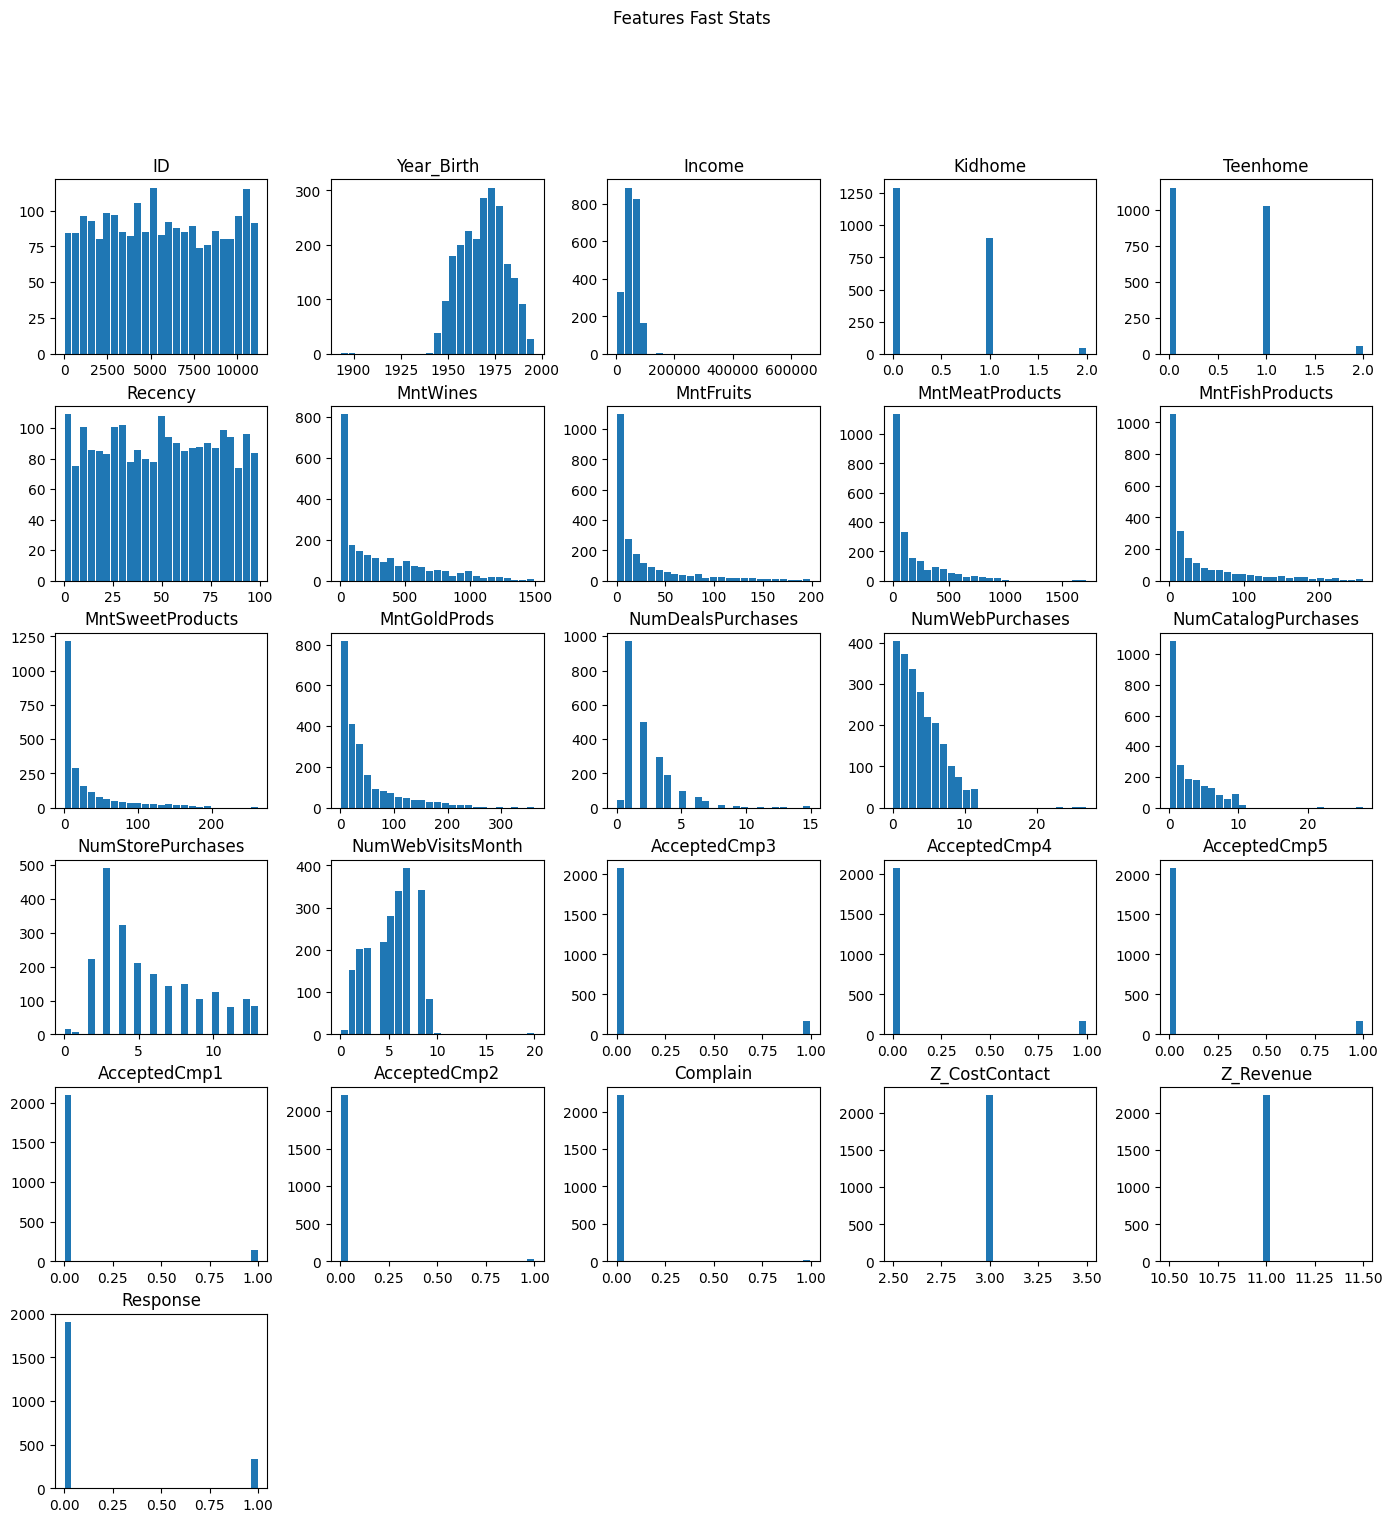

In [5]:
### Análise Rápida das Distribuições dentro da Base

ax = df.hist(bins=25, grid=False, figsize=(17,17), zorder=2, rwidth=0.9)
plt.suptitle("Features Fast Stats")
plt.show()

## Tratamento de Dados

Na seção seguinte, vamos fazer uma limpeza nos dados da base e adicionar novas colunas para auxiliar na análise.

### Valores Ausentes

In [6]:
### Verificação Valores Ausentes

check_missing_values(df)

 ============== Resumo de Valores Nulos ============== 
Coluna  Valores Nulos  Porcentagem (%)
Income             24             1.07

Total de colunas com valores nulos: 1


Apenas a coluna Income com valores nulos (1%). Vamos substituir pela mediana.

In [7]:
### Input da mediana na coluna Income
df_treated = df.copy() ## a partir de agora, vamos ter um novo dataframe com os dados já tratados
treat_missing_values_column_median(df_treated, 'Income')


Valores ausentes na coluna 'Income' foram tratados com sucesso usando a mediana (51381.5).


### Outliers

Pela visão geral dos dados, duas colunas possuem outliers: Income e Year Birth. 

In [8]:
### Verificação Year_Birth

check_outliers_column(df, 'Year_Birth', factor=1.5)

 ============== Resumo de Outliers: Year_Birth ============== 
Limite inferior: 1932.00
Limite superior: 2004.00

Número de outliers: 3
Porcentagem de outliers: 0.13%

Resumo estatístico dos outliers:
count       3.000000
mean     1897.333333
std         3.785939
min      1893.000000
25%      1896.000000
50%      1899.000000
75%      1899.500000
max      1900.000000
Name: Year_Birth, dtype: float64

Primeiros 10 valores outliers:
[1900, 1893, 1899]


In [9]:
### Verificação Income

check_outliers_column(df, 'Income', factor=1.5)

 ============== Resumo de Outliers: Income ============== 
Limite inferior: 0.00
Limite superior: 118350.50

Número de outliers: 8
Porcentagem de outliers: 0.36%

Resumo estatístico dos outliers:
count         8.000000
mean     221604.500000
std      179850.404431
min      153924.000000
25%      157090.500000
50%      157488.000000
75%      161201.500000
max      666666.000000
Name: Income, dtype: float64

Primeiros 10 valores outliers:
[157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]


Para tratar os outliers, vamos substituir pela mediana.

In [10]:
### Input da mediana nos valores outliers da coluna Year_Birth
treat_outliers_column_median(df_treated,'Year_Birth')

Outliers na coluna 'Year_Birth' foram tratados com sucesso usando a mediana (1970.0).


In [11]:
### Input da mediana nos valores outliers da coluna Income
treat_outliers_column_median(df_treated,'Income')

Outliers na coluna 'Income' foram tratados com sucesso usando a mediana (51381.5).


### Categorias incorretas - Marital Status

Correção dos inputs 'Absurd','Alone','YOLO'.

In [12]:
### Correção coluna Marital Status

df_treated['Marital_Status'] = df_treated['Marital_Status'].replace(['Absurd', 'Alone', 'YOLO'], 'Single')


### Criação de Novas Features

Dt_Customer : a coluna Dt_Customer indica a data de adesão. Vamos extrair:
- Mês/Ano da Adesão
- Ano da Adesão
- Tempo de Relacionamento com o Cliente

In [13]:
### Features Dt_Customer

df_treated['Dt_Customer'] = pd.to_datetime(df_treated['Dt_Customer'])
df_treated['Dt_Customer_YearMonth'] = df_treated['Dt_Customer'].dt.to_period('M')
df_treated['Dt_Customer_Year'] = df_treated['Dt_Customer'].dt.year

data_atual = datetime(2015, 1, 1)  # Data considerada para o cálculo do tempo de relacionamento em meses

df_treated['Customer_Age'] = ((data_atual - df_treated['Dt_Customer']) / pd.Timedelta(days=30.44)).astype(int)


In [14]:
create_frequency_table(df_treated,'Dt_Customer_YearMonth')


Distribuição de Dt_Customer_YearMonth:
                       Contagem Porcentagem
Dt_Customer_YearMonth                      
2012-08                     118       5.27%
2013-10                     117       5.22%
2014-05                     112        5.0%
2014-03                     109       4.87%
2013-01                     107       4.78%
2013-08                     104       4.64%
2013-05                     104       4.64%
2013-03                     102       4.55%
2013-02                     100       4.46%
2013-07                      99       4.42%
2012-09                      99       4.42%
2012-11                      97       4.33%
2012-10                      95       4.24%
2013-09                      94        4.2%
2014-04                      94        4.2%
2013-06                      92       4.11%
2013-12                      92       4.11%
2013-11                      90       4.02%
2014-01                      90       4.02%
2013-04                      88     

In [15]:
create_frequency_table(df_treated,'Dt_Customer_Year')


Distribuição de Dt_Customer_Year:
                  Contagem Porcentagem
Dt_Customer_Year                      
2013                  1189      53.08%
2014                   557      24.87%
2012                   494      22.05%


In [16]:
create_frequency_table(df_treated,'Customer_Age')


Distribuição de Customer_Age:
              Contagem Porcentagem
Customer_Age                      
28                 114       5.09%
14                 114       5.09%
22                 106       4.73%
23                 105       4.69%
27                 104       4.64%
21                 103        4.6%
7                  103        4.6%
25                 101       4.51%
9                  100       4.46%
8                   99       4.42%
16                  99       4.42%
17                  98       4.38%
19                  98       4.38%
15                  97       4.33%
18                  96       4.29%
13                  95       4.24%
20                  91       4.06%
10                  91       4.06%
11                  90       4.02%
26                  90       4.02%
12                  87       3.88%
24                  79       3.53%
6                   74        3.3%
29                   6       0.27%


Recency : essa coluna indica quantidade de dias desde a última compra. 
Essa nova coluna separa os clientes em 4 buckets de 0-30 dias, 31-90 dias, 51-90 dias e mais de 100 dias.

In [17]:
### Feature Recency Bucket

bins = [0, 30, 60, 90, df_treated['Recency'].max() + 1]
labels = ['0-30 days', '31-60 days', '61-90 days', '90+ days']
df_treated['Recency_Bucket'] = pd.cut(df_treated['Recency'], bins=bins, labels=labels, include_lowest=True)

In [18]:
create_frequency_table(df_treated,'Recency_Bucket')


Distribuição de Recency_Bucket:
                Contagem Porcentagem
Recency_Bucket                      
0-30 days            724      32.32%
61-90 days           664      29.64%
31-60 days           654       29.2%
90+ days             198       8.84%


Income : coluna de renda. A nova coluna divide a base em 4 buckets de rendas: 0-25k, 25k-50k, 50k-75k, 75k+.

In [19]:
### Feature Income Bucket

bins = [0, 25000, 50000, 75000, float('inf')]
labels = ['0-25k', '25k-50k', '50k-75k', '75k+']    
df_treated['Income_Bucket'] = pd.cut(df_treated['Income'], bins=bins, labels=labels, include_lowest=True)

In [20]:
create_frequency_table(df_treated,'Income_Bucket')


Distribuição de Income_Bucket:
               Contagem Porcentagem
Income_Bucket                      
50k-75k             829      37.01%
25k-50k             818      36.52%
75k+                351      15.67%
0-25k               242       10.8%


Channels : criação de coluna para ver quantidade de canais utilizados para compras

In [21]:
### Feature Total Channels Purchased


df_treated['Total_Channels_Purchased'] = ((df_treated['NumWebPurchases'] > 0).astype(int) + 
                                          (df_treated['NumCatalogPurchases'] > 0).astype(int) + 
                                          (df_treated['NumStorePurchases'] > 0).astype(int))


In [22]:
create_frequency_table(df_treated,'Total_Channels_Purchased')


Distribuição de Total_Channels_Purchased:
                          Contagem Porcentagem
Total_Channels_Purchased                      
3                             1642       73.3%
2                              552      24.64%
1                               40       1.79%
0                                6       0.27%


Conversões em Campanhas : somar o total de conversões em campanhas anteriores

In [23]:
### Total Accepted Cmps

df_treated['Total_Accepted_Cmps'] = df_treated['AcceptedCmp1'] + df_treated['AcceptedCmp2'] + df_treated['AcceptedCmp3'] + df_treated['AcceptedCmp4'] + df_treated['AcceptedCmp5']


In [24]:
create_frequency_table(df_treated,'Total_Accepted_Cmps')


Distribuição de Total_Accepted_Cmps:
                     Contagem Porcentagem
Total_Accepted_Cmps                      
0                        1777      79.33%
1                         325      14.51%
2                          83       3.71%
3                          44       1.96%
4                          11       0.49%


In [25]:
df_treated['Total_Accepted_Cmps'].describe()

count    2240.000000
mean        0.297768
std         0.678381
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: Total_Accepted_Cmps, dtype: float64

## Visualizações - Vamos entender quem são os nossos clientes?

### 1) Características Demográficas

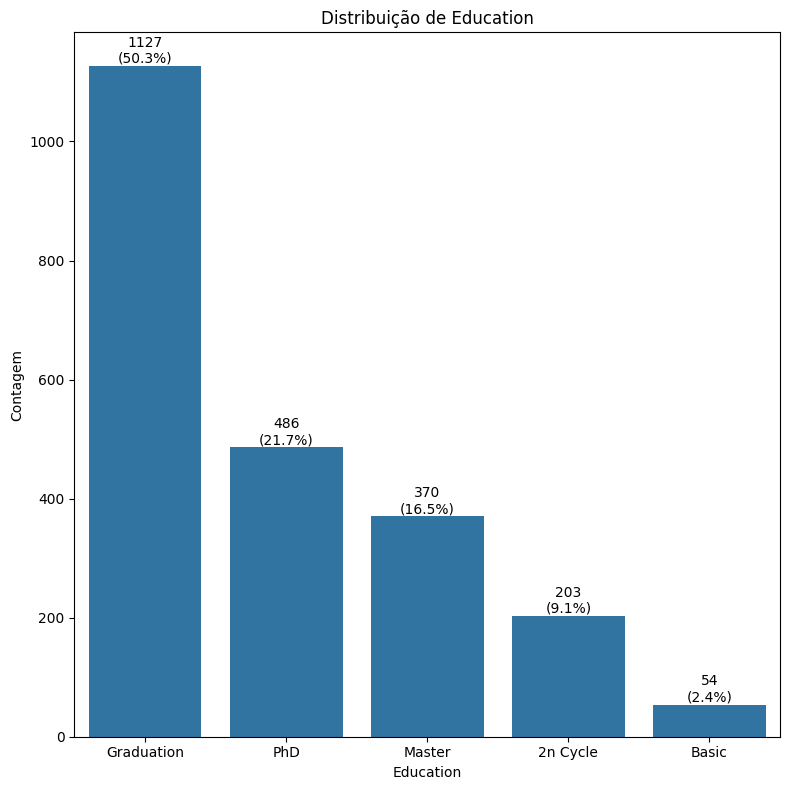

In [26]:
plot_categorical(df_treated, 'Education')

Os usuários são pessoas com nível de educação mais elevado, com 50.3% com nível de graduação e 38.2% com especialização (PhD ou Mestrado)

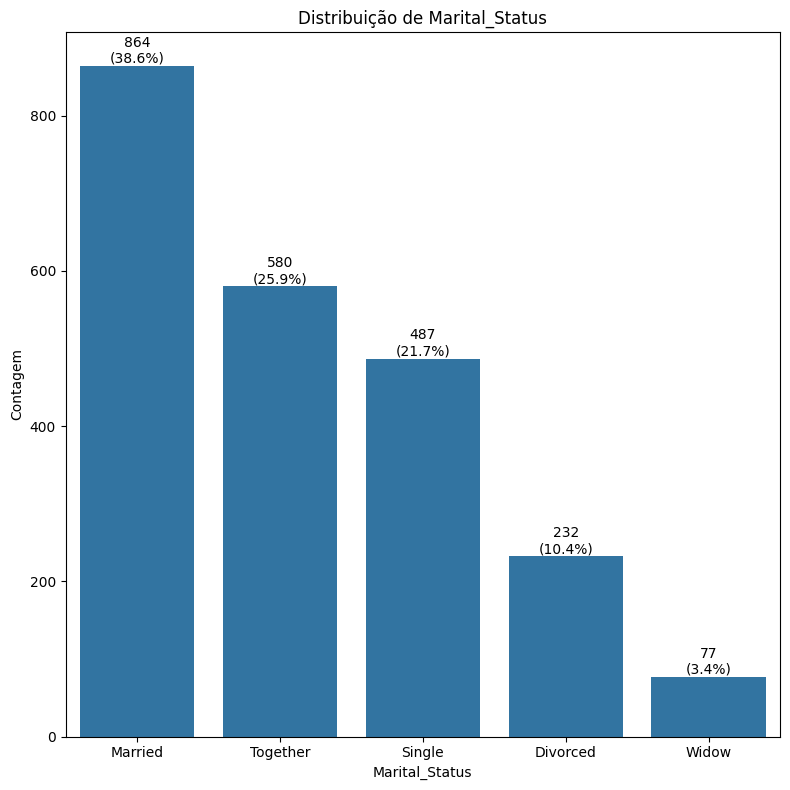

In [27]:
plot_categorical(df_treated, 'Marital_Status')

Sobre o estado civil, a maior parte dos usuários possuem parceiros (61.5% ou é casado ou mora junto com o parceiro)

### 2) Idade

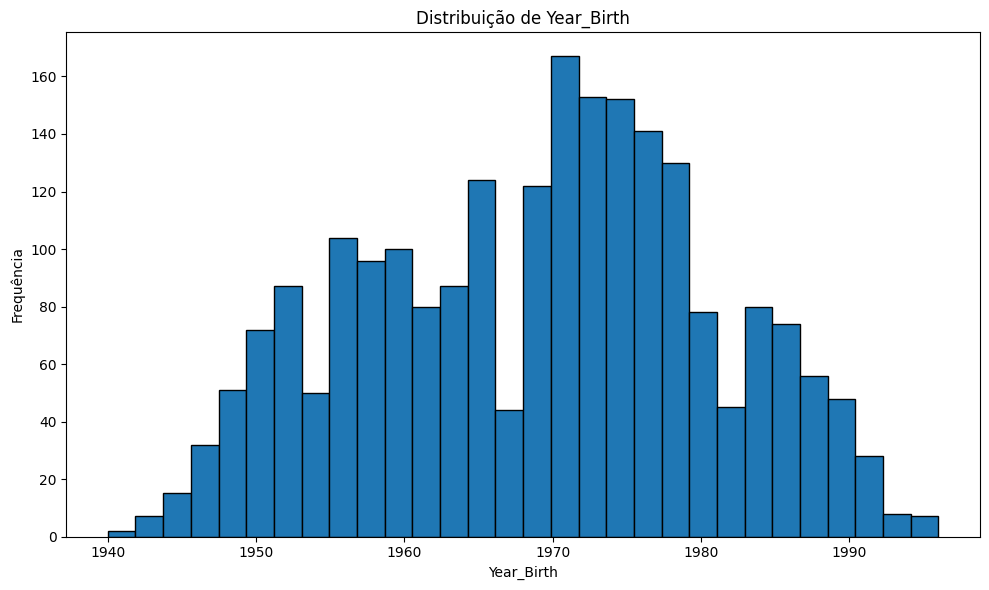

In [28]:
plot_histogram(df_treated,'Year_Birth')

In [29]:
df_treated['Year_Birth'].describe()

count    2240.000000
mean     1968.903125
std        11.694144
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

Os usuários possuem uma faixa etária entre 19 a 75 anos, com uma concentração maior entre 38 a 56 anos.

### 3) Composição Familiar

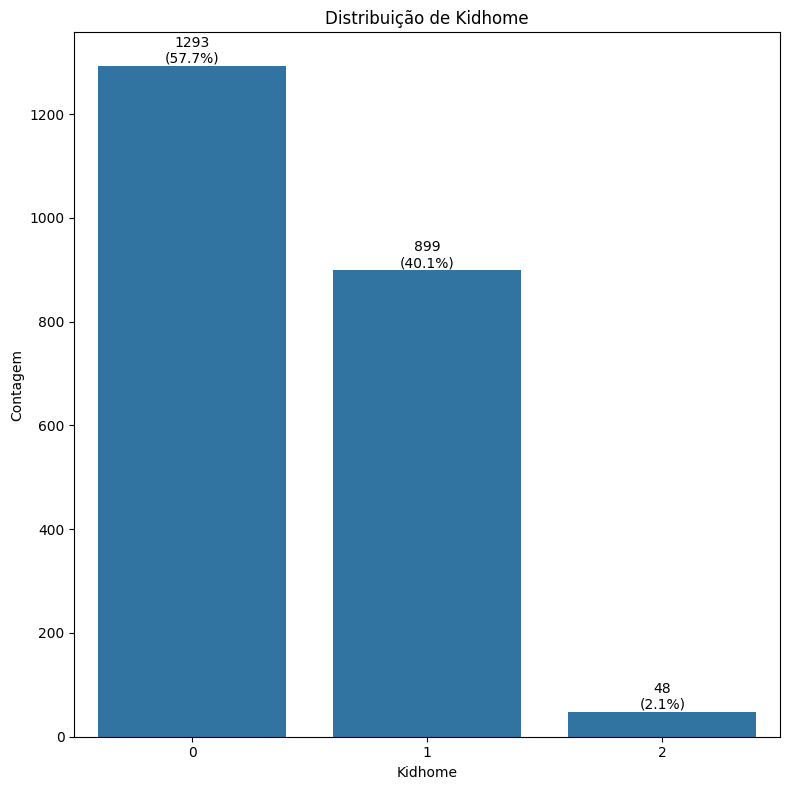

In [30]:
plot_categorical(df_treated, 'Kidhome')

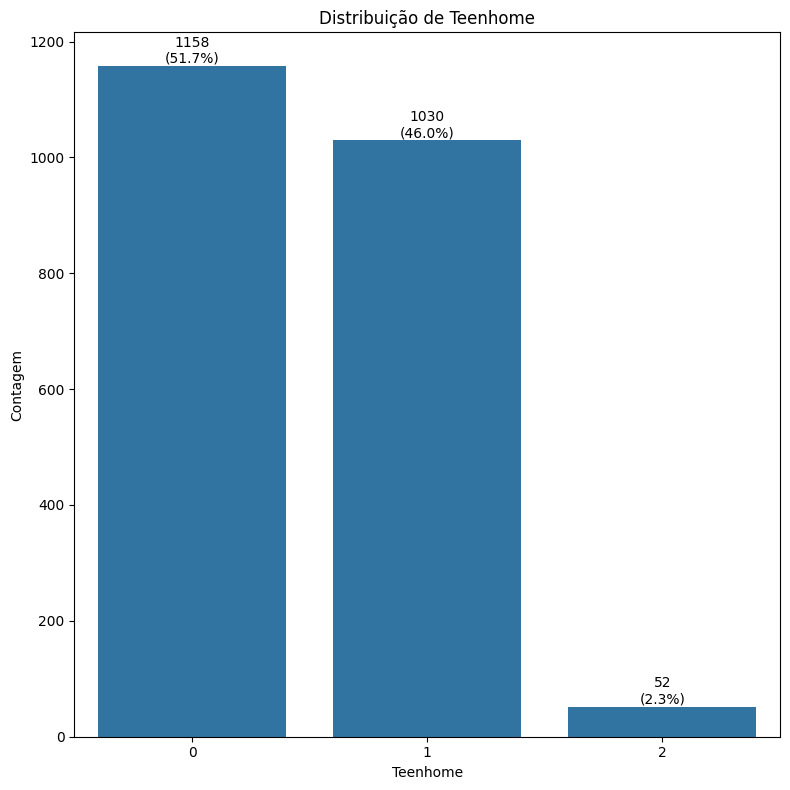

In [31]:
plot_categorical(df_treated, 'Teenhome')

Da nossa base, a maior parte não possui crianças em casa (57.7%). Na análise de adolescentes em casa, a maioria também não possui adolescentes na família (51.7%).

### 4) Financeiro

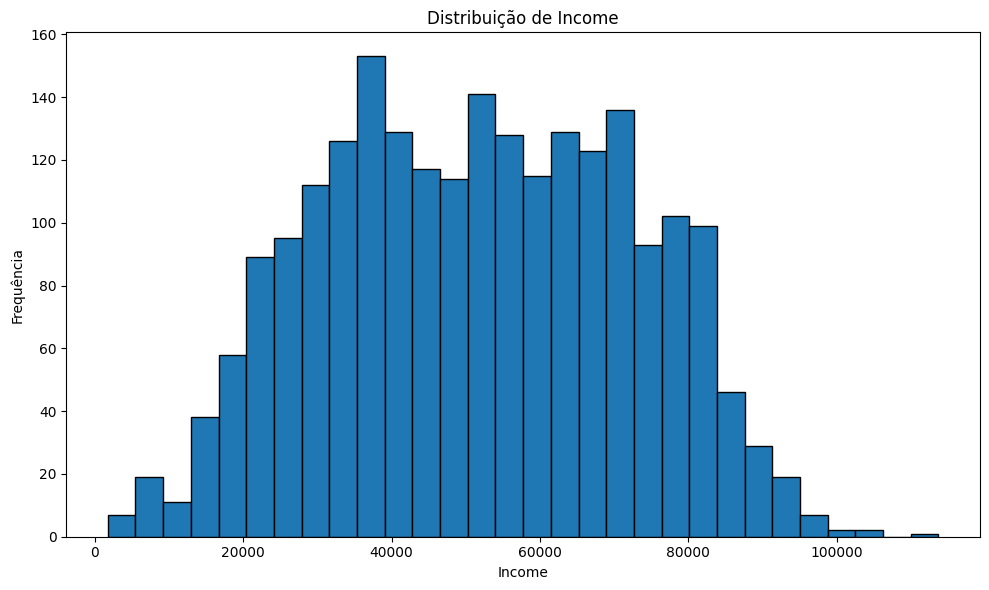

In [32]:
plot_histogram(df_treated,'Income')

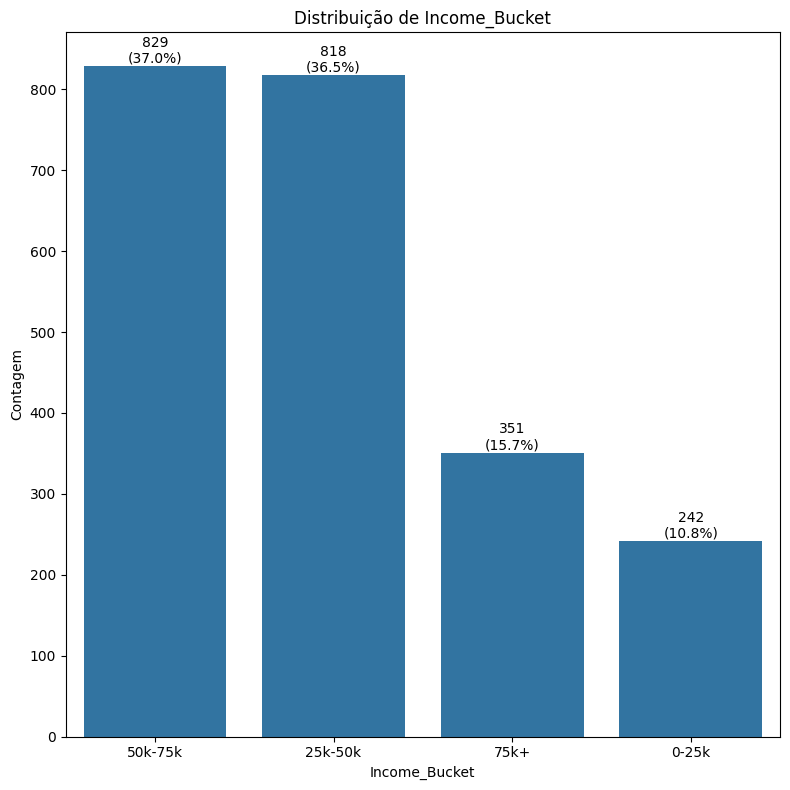

In [33]:
plot_categorical(df_treated,'Income_Bucket')

Maior parte dos clientes estão concentrados na faixa de 25k até 75k.

### 5) Tempo de relacionamento

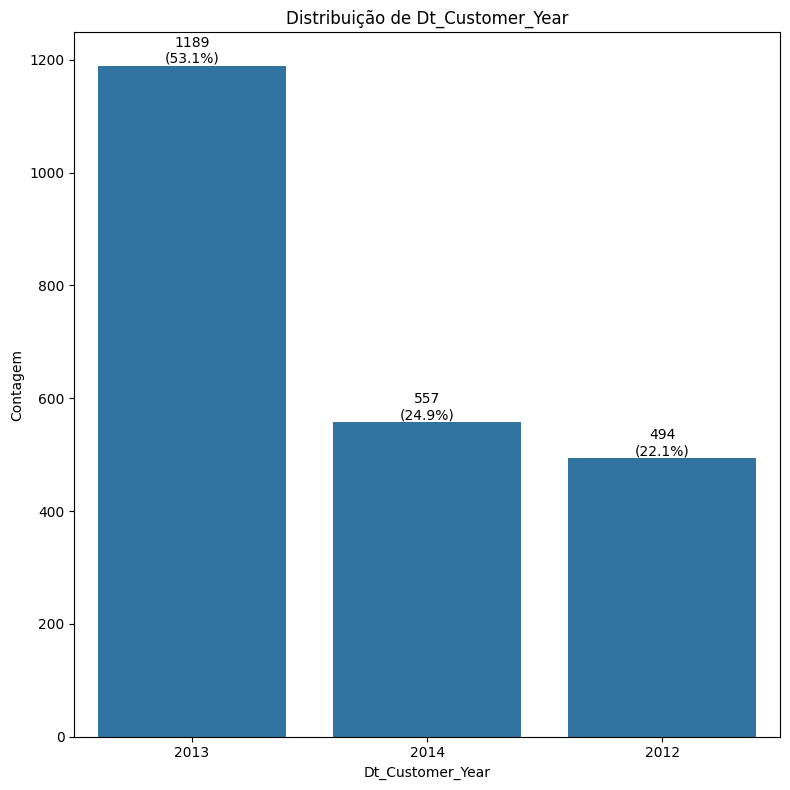

In [34]:
plot_categorical(df_treated,'Dt_Customer_Year')

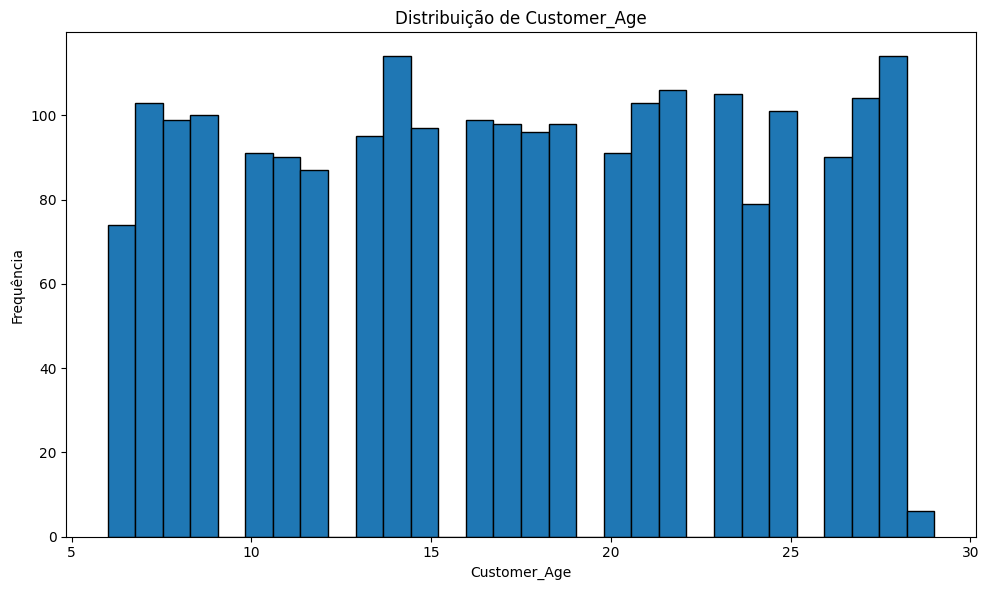

In [35]:
plot_histogram(df_treated,'Customer_Age')

In [36]:
df_treated['Customer_Age'].describe()

count    2240.000000
mean       17.228571
std         6.633754
min         6.000000
25%        12.000000
50%        17.000000
75%        23.000000
max        29.000000
Name: Customer_Age, dtype: float64

A maior parte dos clientes possuem entre 1 a 2 anos de relacionamento com a empresa

### 6) Engajamento Recente

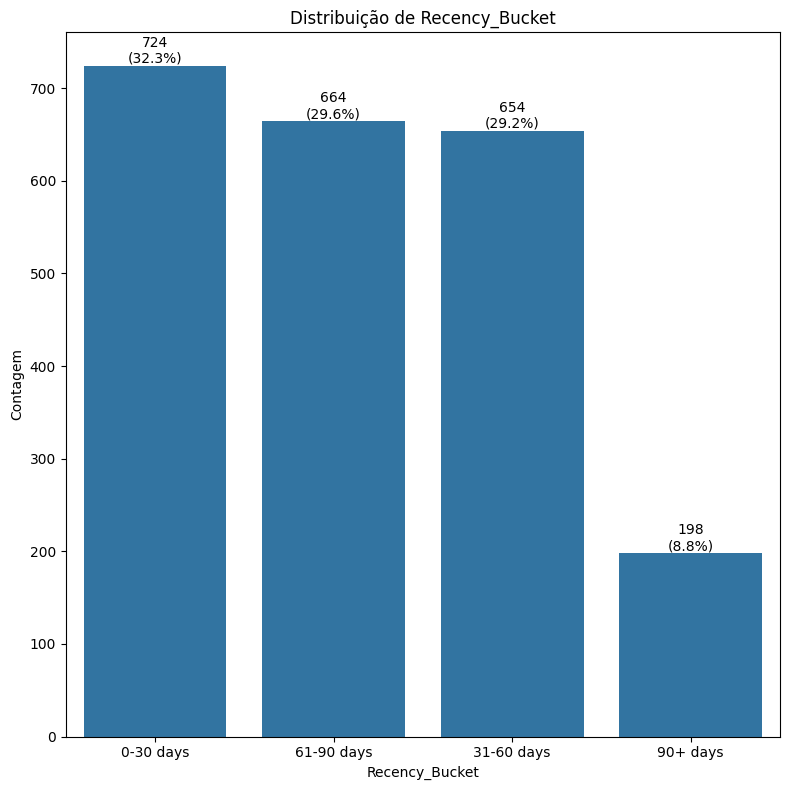

In [37]:
plot_categorical(df_treated,'Recency_Bucket')

67.7% da base não realizou nenhuma compra nos últimos 30 dias.

### 7) Padrões de Compras por Categoria

In [38]:
### Análise Produtos Mais Vendidos

product_sales = df_treated[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=False)
product_sales.index = ['Vinhos', 'Frutas', 'Carnes', 'Peixes', 'Doces', 'Produtos Gold']
print("Top produtos mais vendidos:")
print(product_sales)

Top produtos mais vendidos:
Vinhos           680816
Frutas           373968
Carnes            98609
Peixes            84057
Doces             60621
Produtos Gold     58917
dtype: int64


In [39]:
### Média de Vendas por Produtos

product_sales_avg = df_treated[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean().sort_values(ascending=False)
product_sales_avg.index = ['Vinhos', 'Frutas', 'Carnes', 'Peixes', 'Doces', 'Produtos Gold']
print("Média de vendas por produto:")
print(product_sales_avg)

Média de vendas por produto:
Vinhos           303.935714
Frutas           166.950000
Carnes            44.021875
Peixes            37.525446
Doces             27.062946
Produtos Gold     26.302232
dtype: float64


In [40]:
### Número de Consumidores Por Produto


consumers_count = {
    'Vinhos': (df_treated['MntWines'] > 0).sum(),
    'Frutas': (df_treated['MntFruits'] > 0).sum(),
    'Carnes': (df_treated['MntMeatProducts'] > 0).sum(),
    'Peixes': (df_treated['MntFishProducts'] > 0).sum(),
    'Doces': (df_treated['MntSweetProducts'] > 0).sum(),
    'Produtos Gold': (df_treated['MntGoldProds'] > 0).sum()
}

consumers_df = pd.DataFrame(consumers_count.items(), columns=['Produto', 'Número de Consumidores'])
total_consumers = len(df_treated)
consumers_df['Porcentagem do Total'] = (consumers_df['Número de Consumidores'] / total_consumers * 100).round(2)

consumers_df = consumers_df.sort_values('Porcentagem do Total', ascending=False)

print(consumers_df.to_string(index=False))

      Produto  Número de Consumidores  Porcentagem do Total
       Carnes                    2239                 99.96
       Vinhos                    2227                 99.42
Produtos Gold                    2179                 97.28
       Peixes                    1856                 82.86
       Frutas                    1840                 82.14
        Doces                    1821                 81.29


Os top 3 produtos com maior quantidade de consumidores são Carnes, Vinhos e Produtos Gold (respectivamente).
Quando olhamos a quantidade absoluta de venda de produtos, o ranking top 3 é Vinhos, Frutas e Carnes.

Os produtos Gold, apesar de ter adesão por 97.28% dos leads, possui a menor média de quantidade de vendas (26 produtos).

### 8) Comportamento de Compra por Canal

In [41]:
### Canais com Mais Vendas

channel_sales = df_treated[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=False)
channel_sales.index = ['Web', 'Catálogo', 'Loja Física']
print("Top canais de vendas:")
print(channel_sales)

Top canais de vendas:
Web            12970
Catálogo        9150
Loja Física     5963
dtype: int64


In [42]:
### Número de consumidores por canal

consumers_count = {
    'Web': (df_treated['NumWebPurchases'] > 0).sum(),
    'Catálogo': (df_treated['NumCatalogPurchases'] > 0).sum(),
    'Loja Física': (df_treated['NumStorePurchases'] > 0).sum()
}

consumers_df = pd.DataFrame(consumers_count.items(), columns=['Canal', 'Número de Consumidores'])
total_consumers = len(df_treated)
consumers_df['Porcentagem do Total'] = (consumers_df['Número de Consumidores'] / total_consumers * 100).round(2)

consumers_df = consumers_df.sort_values('Porcentagem do Total', ascending=False)
print(consumers_df.to_string(index=False))

      Canal  Número de Consumidores  Porcentagem do Total
Loja Física                    2225                 99.33
        Web                    2191                 97.81
   Catálogo                    1654                 73.84


O canal com maior número de vendas é a Web, porém o canal com maior quantidadede de consumidores é a Loja Física.

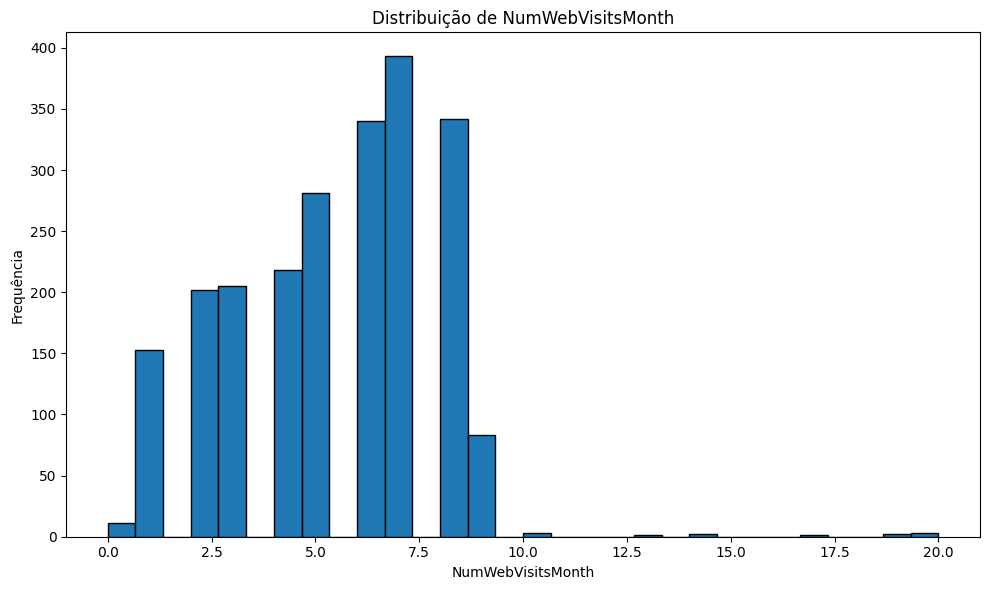

In [43]:
plot_histogram(df_treated,'NumWebVisitsMonth')

In [44]:
df_treated['NumWebVisitsMonth'].describe()

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

Maior parte da base de clientes tem entre 3 a 7 visitas na Web

### 9) Conversões passadas

In [45]:
### Conversão Média por Campanha

campaign_conversion_rate = df_treated[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].mean().mul(100).sort_values(ascending=False)
print("Média de Taxa de Conversão por Campanha:")
print(campaign_conversion_rate)

Média de Taxa de Conversão por Campanha:
AcceptedCmp4    7.455357
AcceptedCmp3    7.276786
AcceptedCmp5    7.276786
AcceptedCmp1    6.428571
AcceptedCmp2    1.339286
dtype: float64


A campanha com melhor performance de conversão foi a última. 

### Padrões e Insights dos Convertidos na Última Campanha

#### Educação

In [46]:
### Taxa de Conversão por Educação
response_by_edu = df_treated.groupby('Education')['Response'].mean().mul(100).sort_values(ascending=False)
response_by_edu


Education
PhD           20.781893
Master        15.405405
Graduation    13.487134
2n Cycle      10.837438
Basic          3.703704
Name: Response, dtype: float64

Os clientes com PhD, apesar de serem 21.7%, eles tiveram uma taxa de conversão maior (20.78%).

#### Estado Civil

In [47]:
### Taxa de Conversão por Estado Civil
response_by_marital = df_treated.groupby('Marital_Status')['Response'].mean().mul(100).sort_values(ascending=False)
response_by_marital

Marital_Status
Widow       24.675325
Single      22.381930
Divorced    20.689655
Married     11.342593
Together    10.344828
Name: Response, dtype: float64

Apesar da maior parte dos nossos usuários (61.5%) possuirem parceiros, a maior taxa de conversão é entre as pessoas que não moram com seus parceiros (Viúvos, Solteiros e Divorciados.)

#### Faixa de Renda

In [48]:
### Taxa de Conversão por Faixa de Renda
response_by_income = df_treated.groupby('Income_Bucket')['Response'].mean().mul(100).sort_values(ascending=False)
response_by_income

/var/folders/v_/vww_frc97d9c4d1l1l9rshzw0000gn/T/ipykernel_99289/383805056.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_by_income = df_treated.groupby('Income_Bucket')['Response'].mean().mul(100).sort_values(ascending=False)


Income_Bucket
75k+       33.903134
25k-50k    11.980440
50k-75k    10.977081
0-25k      10.743802
Name: Response, dtype: float64

Entre os clientes com maior renda 75k+, é onde há a maior taxa de conversão (33.9%)

#### Recência

In [49]:
### Taxa de Conversão por Recência
response_by_recency = df_treated.groupby('Recency_Bucket')['Response'].mean().mul(100).sort_values(ascending=False)
response_by_recency

/var/folders/v_/vww_frc97d9c4d1l1l9rshzw0000gn/T/ipykernel_99289/1089571973.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_by_recency = df_treated.groupby('Recency_Bucket')['Response'].mean().mul(100).sort_values(ascending=False)


Recency_Bucket
0-30 days     23.895028
31-60 days    13.608563
61-90 days     9.186747
90+ days       5.555556
Name: Response, dtype: float64

A maior taxa de conversão foi para clientes que tiveram compras nos últimos 30 dias (menor recência).

#### Visão Global Correlação Todas as Variáveis

Vamos ver a correlação de Pearson da nossa variável target Response com as demais variáveis numéricas da base. Essa análise será importante para ver quais colunas vamos selecionar para a segmentação e para o modelo preditivo.

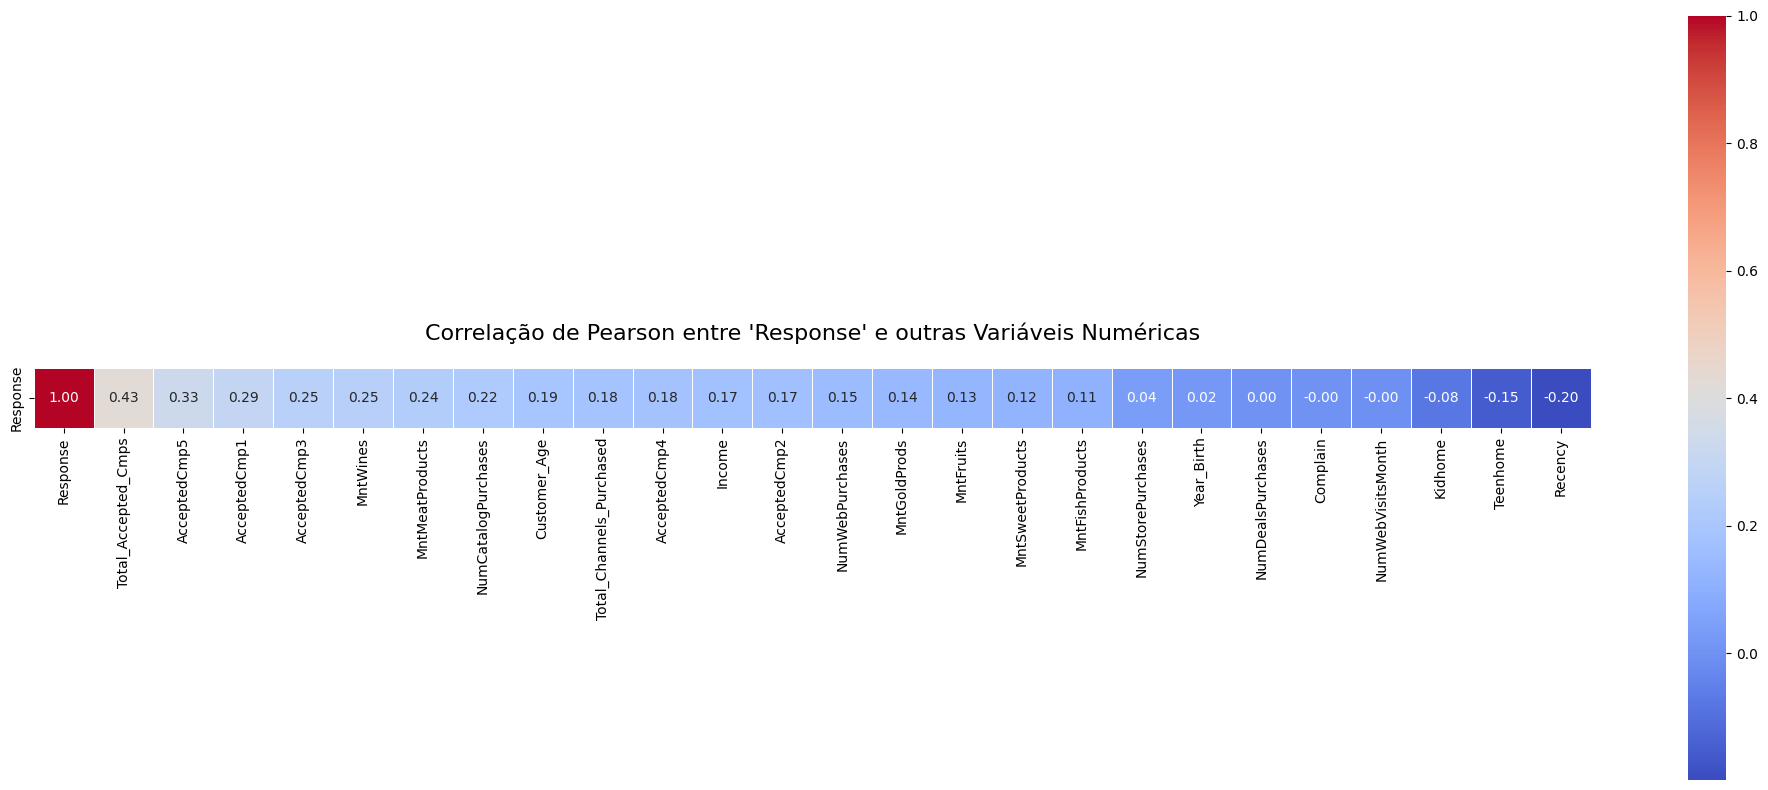

In [50]:
### Correlação de Pearson

numeric_columns = df_treated.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_treated[numeric_columns]
df_numeric = df_numeric.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1) # ID : alta cardinalidade // as demais são constantes

corr_matrix = df_numeric.corr()
response_corr = corr_matrix.loc['Response'].sort_values(ascending=False)

plt.figure(figsize=(20, 8))  
sns.heatmap(response_corr.to_frame().T, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlação de Pearson entre 'Response' e outras Variáveis Numéricas", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## Plano para atingir o objetivo

O objetivo dessa análise é garantir que para o time de marketing que as próximas campanhas sejam mais *lucrativas*.

Recapitulando os dados da última campanha:

- 2240 leads selecionados aleatoriamente
- Custo médio por lead : 3
- Receita média por lead : 11
- Taxa de Conversão: 15%
- Lucro Global: - 3046 (Resultado negativo)

Abaixo, segue uma explicação breve sobre a conversão mínima que deve ser atingida:

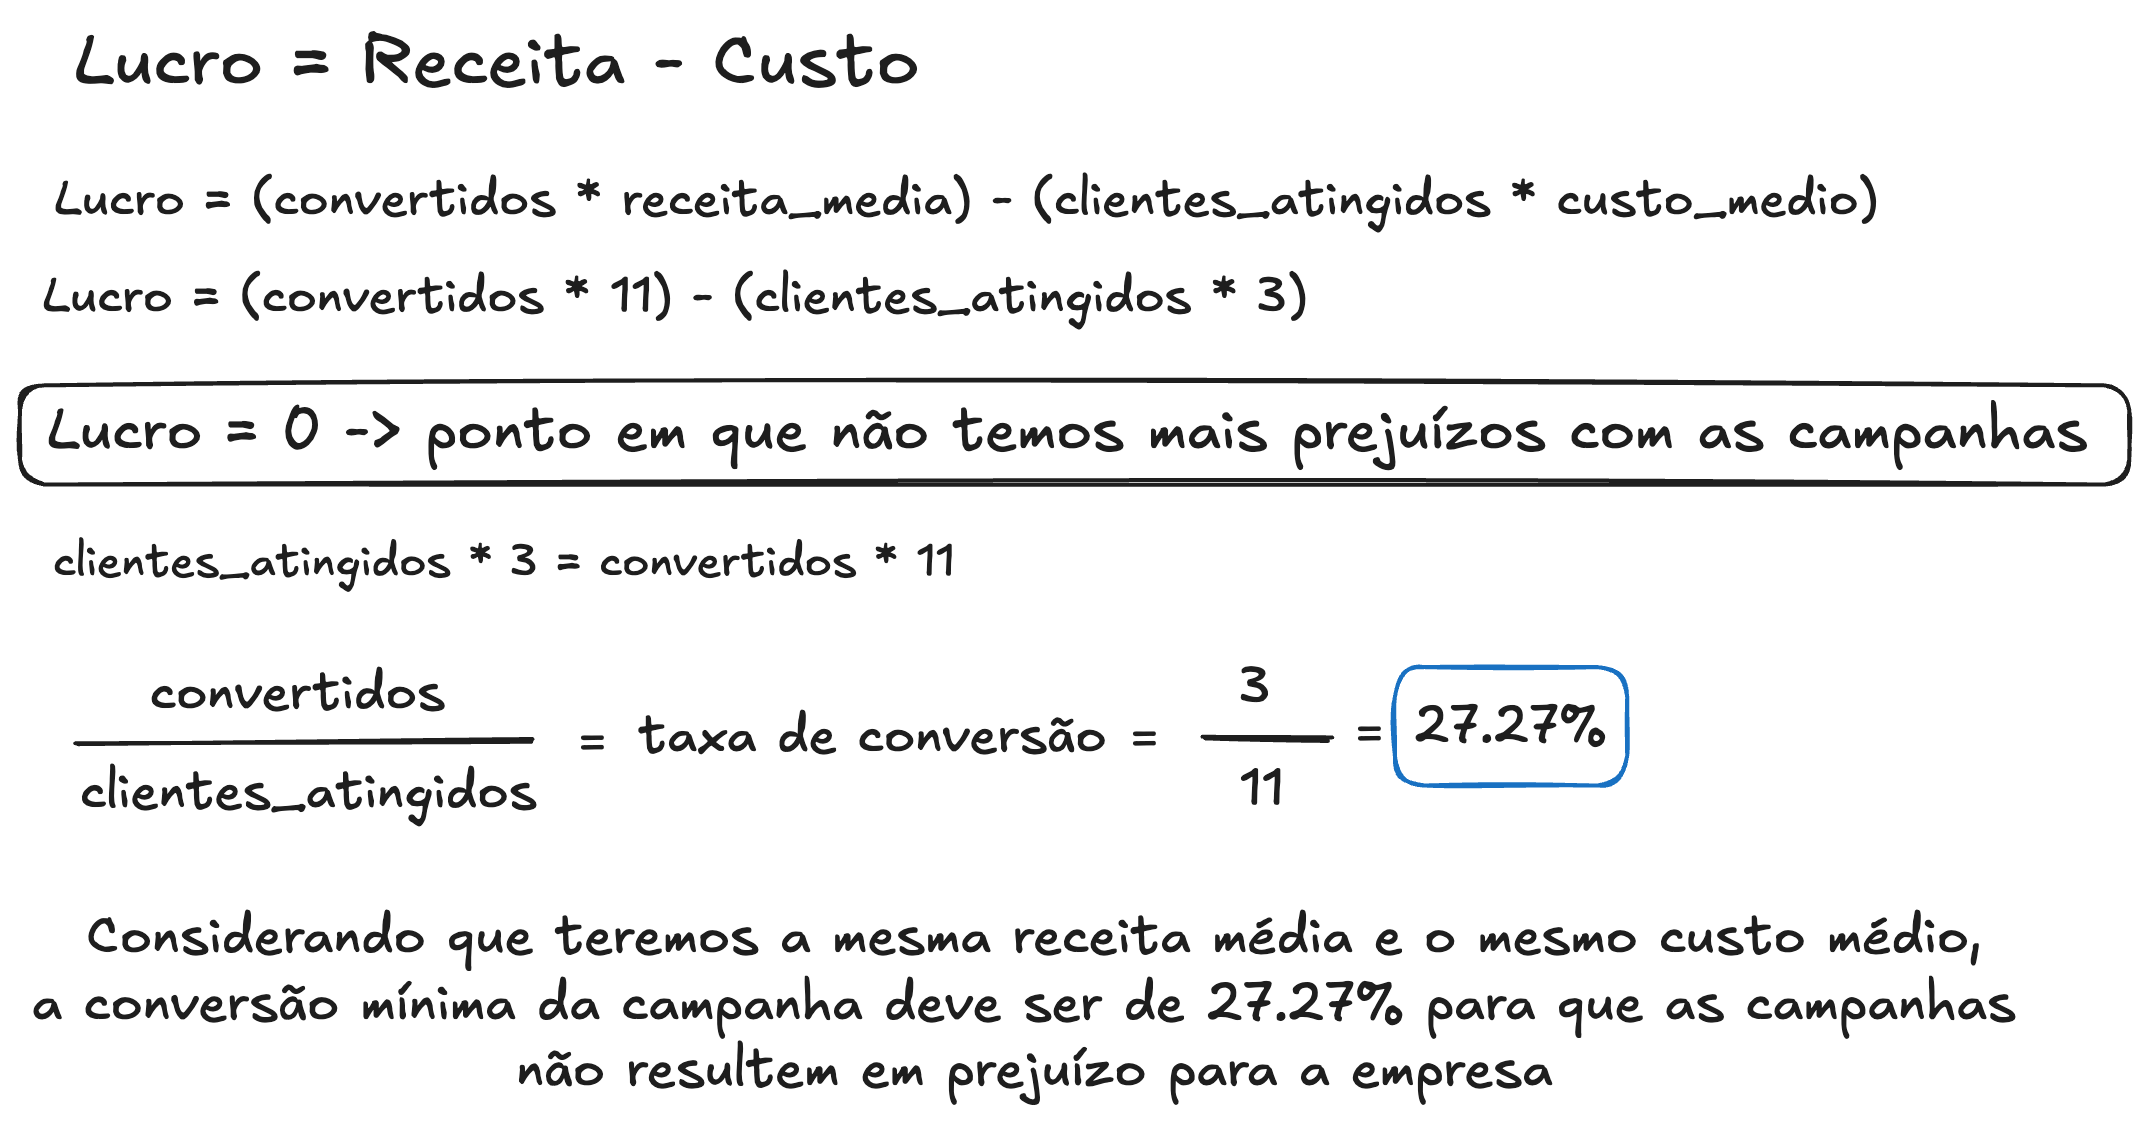

Para chegar nesse objetivo, de posse com a base de dados dos usuários aleatórios que temos,o plano será:

- Construir uma segmentação de clientes para lançar campanhas com leads em que teremos uma maior taxa de conversão
- Ter um modelo preditivo que irá ajudar a:
    - Reduzir o disparo das campanhas (redução de custos)
    - Aumentar a taxa de conversão (aumento de receita)

In [51]:
### Exportar a base tratada em csv, para ser utilizada na segmentacao e no treinamento do modelo preditivo
df_treated.to_csv('data/data_clean.csv', index=False)